In [1]:
import pandas as pd
import seaborn as sns
# import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tweets = pd.read_csv('./csta.csv', names=['date', 'tweet'], encoding='utf8')

In [3]:
tweets['date'] = pd.to_datetime(tweets['date'])
tweets['tweet'] = tweets['tweet'].astype(str)

In [4]:
retweets = tweets[tweets['tweet'].str.contains('RT')]

In [5]:
tweets['is_retweet'] = tweets['tweet'].apply(lambda t: t if 'RT' in t else 0)

In [6]:
new_col = []
for tweet in tweets['is_retweet']:
    if tweet is not 0:
        new_col.append('Retweet')
    else:
        new_col.append('Original')
tweets['is_retweet'] = new_col

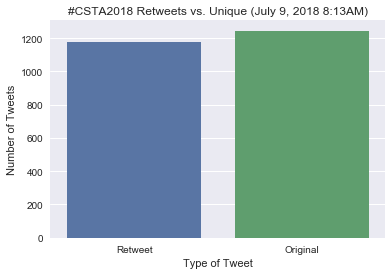

In [7]:
sns.set(style="darkgrid")
ax = sns.countplot(x="is_retweet", data=tweets, )
ax.set_title('#CSTA2018 Retweets vs. Unique (July 9, 2018 8:13AM)')
ax.set_xlabel('Type of Tweet')
ax.set_ylabel('Number of Tweets')
figure = ax.get_figure()
figure.savefig('retweets.jpg')

In [8]:
time_series = tweets.groupby(
    [pd.Grouper(key='date',freq='H')]
).size().reset_index(name='count')

In [9]:
time_series

,date,count
0,2018-06-29 14:00:00,3
1,2018-06-29 15:00:00,3
2,2018-06-29 16:00:00,4
3,2018-06-29 17:00:00,1
4,2018-06-29 18:00:00,2
5,2018-06-29 19:00:00,2
6,2018-06-29 20:00:00,4
7,2018-06-29 21:00:00,0
8,2018-06-29 22:00:00,6
9,2018-06-29 23:00:00,0


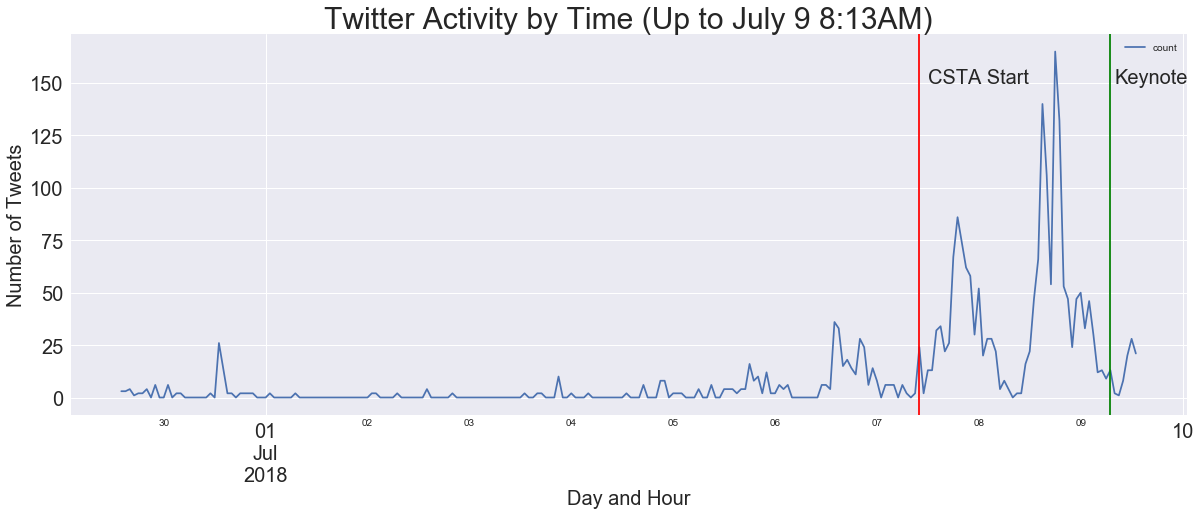

In [10]:
ax = time_series.plot(x='date', y='count', figsize=(20, 7))
ax.axvline(x='2018-07-07 10:00:00', color='red', label='Start')
ax.text(x='2018-07-07 12:30:00', y=150, s='CSTA Start', fontsize=20)
ax.axvline(x='2018-07-09 07:30:00', color='green', label='Start')
ax.text(x='2018-07-09 08:30:00', y=150, s='Keynote', fontsize=20)
sns.set_style('darkgrid')
ax.set_title('Twitter Activity by Time (Up to July 9 8:13AM)', fontSize=30)
ax.set_xlabel('Day and Hour', fontSize=20)
ax.set_ylabel('Number of Tweets', fontSize=20)
ax.tick_params(labelsize=20, axis='both')
figure = ax.get_figure()
figure.savefig('timeseries.jpg')
# plt.show()

## Word Frequencies

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

In [12]:
# nltk dependencies needed for tokenizing and removing stop words
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/jp218s/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jp218s/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [76]:
word_frequencies = {}
stop_words = set(stopwords.words('english'))
manual_stop_words = ('rt', 'if', 'like', 'https', 'co', 'csta2018')

for word in manual_stop_words:
    stop_words.add(word)

tokenizer = RegexpTokenizer(r'\w+')

tokens = []

for index, row in tweets.iterrows():
    current_tokens = tokenizer.tokenize(row['tweet'].lower())
    for token in current_tokens:
        tokens.append(token)
# tokens = tokenizer.tokenize(tweets['tweet'].iloc[0])

filtered_tokens = [w for w in tokens if not w in stop_words]

In [77]:
import collections

counter = collections.Counter(filtered_tokens)

In [78]:
clean_tokens = []

for word in tokens:
    if len(word) != 10:
        clean_tokens.append(word)
filtered_tokens = [w for w in clean_tokens if not w in stop_words]

In [79]:
filtered_tokens

['csatellis',
 'function',
 'ordering',
 'meal',
 'api',
 'menu',
 'googleedu',
 'codesparkapp',
 'happen',
 'omaha',
 'nebraska',
 'swing',
 'booth',
 '22',
 'spin',
 'wheel',
 'win',
 'prizes',
 'olk',
 'robotgarden',
 'ready',
 'booth',
 '45',
 'come',
 'visit',
 'afternoon',
 'exhibit',
 'hall',
 'opens',
 '1',
 'hummingbirdbit',
 'cst',
 'codesparkapp',
 'glitch',
 'arrived',
 'loves',
 'meeting',
 'computer',
 'science',
 'educators',
 'swing',
 'codesparkapp',
 'booth',
 '22',
 'say',
 'breastfeeding',
 'breastfeedinginpublic',
 'surprise',
 'anything',
 'legaldeathcult',
 'shock',
 'many',
 'good',
 'cs',
 'convos',
 'happening',
 'using',
 'workshop',
 'find',
 'exactly',
 'right',
 'love',
 'well',
 'maps',
 'f',
 'function',
 'ordering',
 'meal',
 'api',
 'menu',
 'googleedu',
 'mberry',
 'function',
 'block',
 'code',
 'use',
 'knowing',
 'name',
 'need',
 'know',
 'works',
 'abstraction',
 'clcsimon',
 'new',
 'physical',
 'computing',
 'guides',
 'microbit',
 'gt',
 'gt',

In [80]:
counter = collections.Counter(filtered_tokens)

In [81]:
counter

Counter({'csatellis': 5,
         'function': 10,
         'ordering': 5,
         'meal': 5,
         'api': 6,
         'menu': 5,
         'googleedu': 7,
         'codesparkapp': 25,
         'happen': 10,
         'omaha': 309,
         'nebraska': 51,
         'swing': 37,
         'booth': 141,
         '22': 18,
         'spin': 10,
         'wheel': 10,
         'win': 12,
         'prizes': 10,
         'olk': 8,
         'robotgarden': 14,
         'ready': 94,
         '45': 10,
         'come': 119,
         'visit': 38,
         'afternoon': 23,
         'exhibit': 15,
         'hall': 17,
         'opens': 12,
         '1': 25,
         'hummingbirdbit': 14,
         'cst': 19,
         'glitch': 27,
         'arrived': 18,
         'loves': 8,
         'meeting': 29,
         'computer': 209,
         'science': 188,
         'educators': 98,
         'say': 63,
         'breastfeeding': 1,
         'breastfeedinginpublic': 1,
         'surprise': 1,
         'anything'

In [121]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random

In [119]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

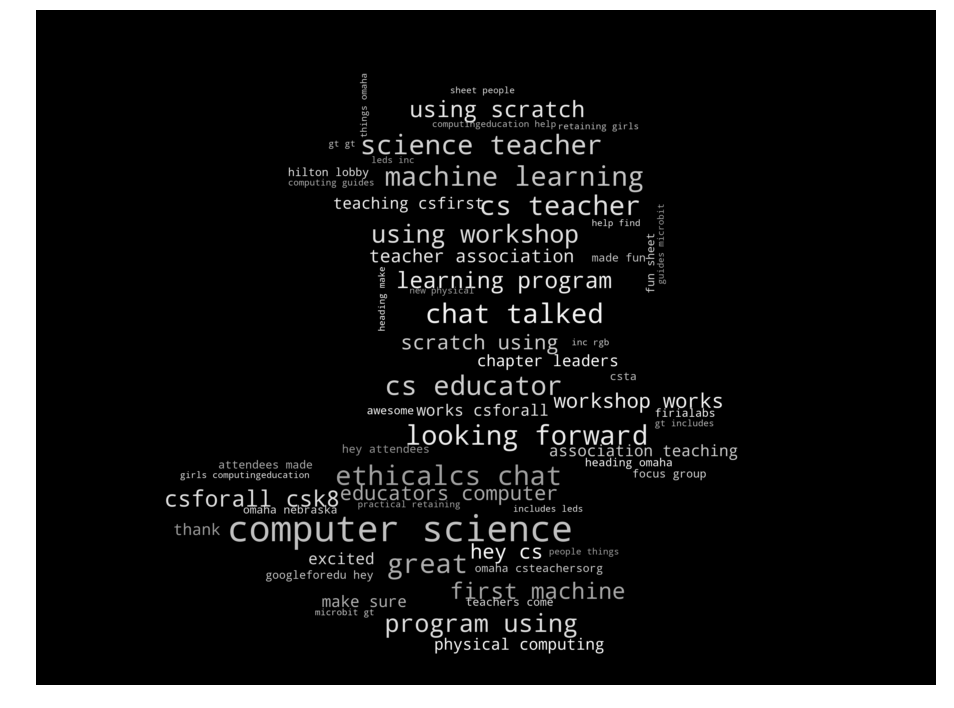

In [123]:
mask = np.array(Image.open('./mona.jpg'))

words = ' '.join(word for word in filtered_tokens)
wordcloud = WordCloud(
    background_color='black',
    scale=10,
    mask=mask
).generate(words)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=1), interpolation='bilinear')
plt.tight_layout()
plt.axis("off")
plt.savefig('./word_cloud.png', bbox_inches='tight')